In [2]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.io
from numpy import linalg as LA
import random
from sklearn import preprocessing 

## Question 1 - Ridge Regression
### Implements ridge regression on housing data set. 

### Question 1 a) attached in separate pdf

In [1478]:
dataset_training_housing=scipy.io.loadmat('housing_dataset/housing_data.mat')
X_train = dataset_training_housing['Xtrain']
X_train = X_train-np.mean(X_train,axis=0)
Y_train = dataset_training_housing['Ytrain']
Y_train = Y_train-np.mean(Y_train,axis=0)
X_validate = dataset_training_housing['Xvalidate']
X_validate = X_validate - np.mean(X_validate,axis=0)
Y_validate = dataset_training_housing['Yvalidate']
Y_validate = Y_validate - np.mean(Y_validate,axis=0)

In [1479]:
def calculatingPseudoInverse(X_dim_train, lambd):
    X_T = X_dim_train.T
    XTX = np.dot(X_T, X_dim_train) + lambd*np.identity(np.shape(X_dim_train)[1]) 
    XTX_inverse = np.linalg.inv(XTX) 
    pseudoinverse = np.dot(XTX_inverse, X_T)
    return pseudoinverse

In [1480]:
def calculateRSS(y_true, y_predicted):
    difference = np.subtract(y_predicted, y_true)
    sqr = np.square(difference)
    return np.sum(sqr)

In [1481]:
def training(X_train, Y_train, lambd):
    new_dim = np.ones((np.shape(X_train)[0],1)) 
    X_dim_train = np.hstack((X_train, new_dim))
    pseudoInverse = calculatingPseudoInverse(X_dim_train, lambd)
    trained_weights = np.dot(pseudoInverse, Y_train)
    predicted_yHat = np.dot(X_dim_train, trained_weights) 
    RSS = calculateRSS(Y_train, predicted_yHat)
    return (RSS, trained_weights, predicted_yHat)

In [1667]:
(RSS, trained_weights, predicted_yHat) = training(X_train, Y_train, math.pow(10,-1))

### Perform 10-fold cross validation to tune the hyper parameter lambda

In [1492]:
def crossValidation(X_train, Y_train, k, lambd):
    alpha_hat = sum(Y_train[0])/np.shape(Y_train)[0]
    split_train_X = np.split(X_train, k)
    split_train_Y = np.split(Y_train, k)
    ind = 0
    validation_RSS = []
    while ind < k:
        trainingX = np.array([])
        trainingY = np.array([])
        validationX = split_train_X[ind]
        validationY = split_train_Y[ind]
        for i in range(k):
            if ind != i:
                if len(trainingX) == 0:
                    trainingX = split_train_X[i]
                    trainingY = split_train_Y[i]
                else:
                    trainingX = np.vstack((trainingX, split_train_X[i]))
                    trainingY = np.vstack((trainingY, split_train_Y[i]))
        (RSS, trained_weights, predicted_yHat) = training(trainingX, trainingY, lambd)
        (RSS_validation, predictedY) = validation_testing(validationY, validationX, trained_weights)
        validation_RSS.append(RSS_validation)
        ind = ind + 1
    return validation_RSS

In [1644]:
def validation_testing(Y_validate, X_validate, trained_weights):
    new_dim = np.ones((np.shape(X_validate)[0],1))
    X_dim_validate = np.hstack((X_validate,new_dim))
    predictedY = np.dot(X_dim_validate, trained_weights)
    RSS = calculateRSS(Y_validate, predictedY)
    return (RSS, predictedY)

In [1664]:
def validation_RSS(lambd,k,n, X_train, Y_train):
    initial = lambd
    avgVal = []
    for i in range(n):
        avgVal.append(np.mean(crossValidation(X_train, Y_train, k, lambd)))
        lambd = lambd*math.pow(10,-1)
    ind = avgVal.index(min(avgVal))+1
    return math.pow(initial,ind)

In [1665]:
##optimal lambda value for ridge regression
validation_optimal_RSS = validation_RSS(math.pow(10,-1),10,15, X_train, Y_train)
print validation_optimal_RSS

0.1


In [1668]:
(RSS_validation, validation_prediction)= validation_testing(Y_validate, X_validate, trained_weights)

### The plot of the weights and the RSS is the same as for hw3.
### The histogram displaying the RSS for the validation set of housing data is also similar to the results achieved in hw 3.
### As the data is centered, the alpha approximation is irrelevent when calculating the weights. The cross-validation resulted in 0.1 being the most optimal value for minimizing RSS in the validation data.

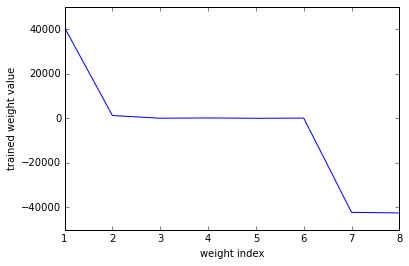

In [1669]:
plt.plot(range(1,len(trained_weights)),trained_weights[0:8])
plt.xlabel('weight index')
plt.ylabel('trained weight value')

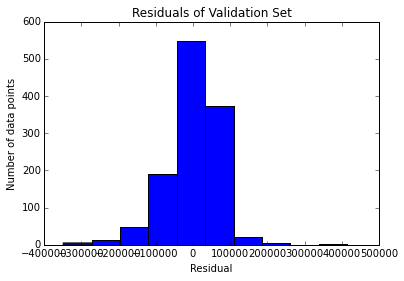

In [1670]:
residuals = np.subtract(validation_prediction, Y_validate)
plt.hist(residuals, bins=10)
plt.xlabel('Residual')
plt.ylabel('Number of data points')
plt.title("Residuals of Validation Set")

## Question 2 -- Logistic Regresison 
### part b - calculate gradient ascent 

In [690]:
X_data = np.matrix([[0, 3, 1], [1, 3, 1], [0,1,1], [1,1,1]])
Y_data = np.array([[1],[1],[0],[0]]).flatten()

In [557]:
def sigmoid(gamma):
    return (1/(1+np.exp(-gamma)))

In [1178]:
def risk(weights, X_data, Y_data):
    wDotX = np.dot(X_data, weights)
    sigCalc = sigmoid(wDotX)
    sigCalc[sigCalc==0]=math.pow(10,-300)
    
    subCalc = float(1)-sigCalc
    subCalc[subCalc==0]=math.pow(10,-300)
    
    normSigCalc= np.log(sigCalc)
    subSigCalc = np.log(subCalc)
    
    subY_data = float(1)- Y_data
    return -(np.dot(Y_data,normSigCalc)+np.dot(subY_data, subSigCalc))

In [1177]:
def weight_update(weights, X_data, Y_data, epsilon):
    xDotW = np.dot(X_data, weights)
    sigCalc = sigmoid(xDotW).flatten()
    subY_data = Y_data - sigCalc
    update = epsilon*np.dot(subY_data,X_data)
    return weights + update.T

### Gradient ascent for 2 iterations
### initial weight vector = $[-2, 1, 0]^T$
### results show that 2 iterations is not enough to accurately predict the posterior probability $P(Y=1|X=x_i)$

In [1138]:
weights0 = np.array([[-2], [1], [0]])

In [1121]:
def batchGradient(weights, X_data, Y_data, n, esp):
    ind = 0
    calcRisk = []
    while ind <= n:
        currRisk = risk(weights, X_data, Y_data)
        calcRisk.append(currRisk)
        predictions = []
        for i in range(len(X_data)):
            pred = sigmoid(np.dot(weights.T,X_data[i].T))
            predictions.append(pred)
        predictions = np.array(predictions)
        weights = weight_update(weights,X_data,Y_data,esp)
        print("The current risk for iteration", ind, currRisk)
        print("The current predicted posterior probabilites for this iteration is:", (predictions.T)[0])
        print("Resulting weights in batch gradient descent is:")
        print weights
        ind = ind + 1
    return calcRisk

In [1179]:
batchGradient(weights0,X_data,Y_data,2,1)

('The current risk for iteration', 0, matrix([[ 1.98837241]]))
('The current predicted posterior probabilites for this iteration is:', array([[ 0.95257413,  0.73105858,  0.73105858,  0.26894142]]))
Resulting weights in batch gradient descent is:
[[-2.        ]
 [ 0.94910188]
 [-0.68363271]]
('The current risk for iteration', 1, matrix([[ 1.7206171]]))
('The current predicted posterior probabilites for this iteration is:', array([[ 0.89693957,  0.54082713,  0.56598026,  0.15000896]]))
Resulting weights in batch gradient descent is:
[[-1.69083609]
 [ 1.91981257]
 [-0.83738862]]
('The current risk for iteration', 2, matrix([[ 1.85469978]]))
('The current predicted posterior probabilites for this iteration is:', array([[ 0.99276849,  0.96199213,  0.74695242,  0.35242149]]))
Resulting weights in batch gradient descent is:
[[-2.00524971]
 [ 0.95615681]
 [-1.89152315]]


[matrix([[ 1.98837241]]), matrix([[ 1.7206171]]), matrix([[ 1.85469978]])]

## Question 3 - Logistic Regression on SPAM dataset

In [3]:
spam_data_train= scipy.io.loadmat('spam_dataset/spam_data.mat')['training_data']
spam_data_train = np.hstack((spam_data_train,np.ones(spam_data_train.shape[0]).reshape(spam_data_train.shape[0],1)))
spam_data_label= scipy.io.loadmat('spam_dataset/spam_data.mat')['training_labels'][0]
spam_data_test =scipy.io.loadmat('spam_dataset/spam_data.mat')['test_data']
spam_data_test = np.hstack((spam_data_test,np.ones(spam_data_test.shape[0]).reshape(spam_data_test.shape[0],1)))

### Standardizing data
### Splitting data for validation

In [1674]:
def standardization(spam_data_train):
    standardized_spam = preprocessing.scale(spam_data_train)
    binarized_spam = preprocessing.binarize(spam_data_train)
    transformed_spam = np.log(spam_data_train+0.1)
    return (standardized_spam, binarized_spam, transformed_spam)
    

In [1675]:
preprocessed_data = standardization(spam_data_train)

### runs logistic regression on each transformed spam data set 
### uses batch gradient descent created for Question 2

In [1681]:
def logRegression_batchgradient(preprocessed_data,spam_data_label,n, epsilon): ##input is a tupule of all the standadarized data
    ##want to perform batch grad. descent on each type of preprocessed data
    risk_calc = []
    for preprocessed in preprocessed_data:
        weights = np.zeros(preprocessed.shape[1])
        ind = 0
        calcRisk = []
        while ind <= n:
            currRisk = risk(weights, preprocessed, spam_data_label)
            calcRisk.append(currRisk)
            weights = weight_update(weights,preprocessed, spam_data_label,epsilon)
            ind = ind +1 
        risk_calc.append(calcRisk)
    return risk_calc

In [1684]:
riskPreprossesed = logRegression_batchgradient(preprocessed_data,spam_data_label,1000, math.pow(10,-3))

### Risk graphs for batch gradient descent

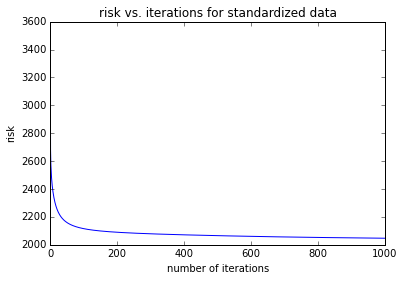

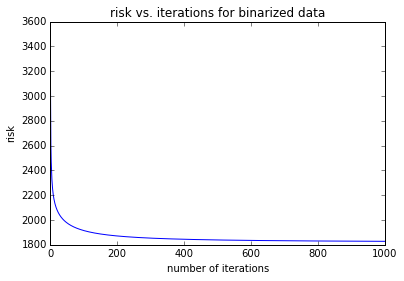

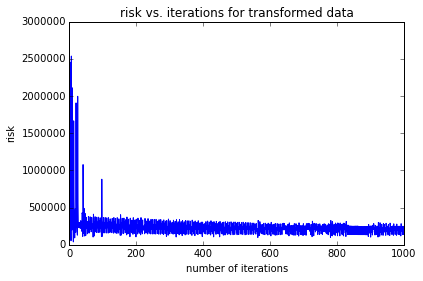

In [1703]:
x_range = range(1001)
plt.figure()
plt.title('risk vs. iterations for standardized data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, riskPreprossesed[0])

plt.figure()
plt.title('risk vs. iterations for binarized data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, riskPreprossesed[1])

plt.figure()
plt.title('risk vs. iterations for transformed data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, riskPreprossesed[2])

In [1686]:
def logRegression_stochastic(preprocessed_data,spam_data_label,n,epsilon):
    risk_calc = []
    for preprocessed in preprocessed_data:
        weights = np.zeros(preprocessed.shape[1])
        ind = 0
        calcRisk = []
        while ind <= n:
            currRisk = risk(weights, preprocessed, spam_data_label)
            calcRisk.append(currRisk)
            dataInd = random.sample(range(preprocessed.shape[0]),1)
            dataX = preprocessed[dataInd] 
            dataY = spam_data_label[dataInd]
            weights = weight_update(weights,dataX, dataY,epsilon)
            ind = ind +1 
        risk_calc.append(calcRisk)
    return risk_calc

In [1725]:
riskStochastic = logRegression_stochastic(preprocessed_data,spam_data_label,1000,math.pow(10,-10))

### Risk graphs for stochastic gradient descent

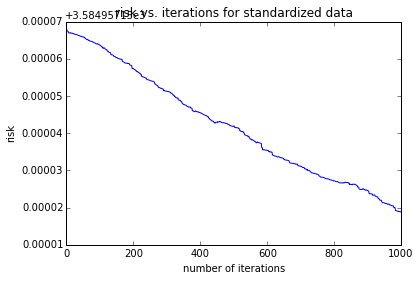

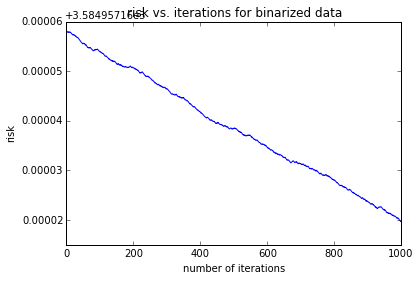

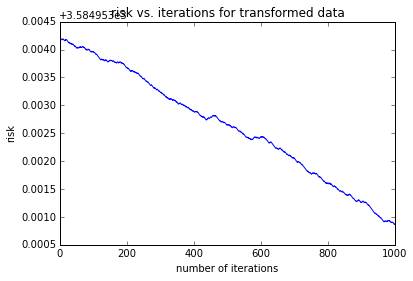

In [1728]:
x_range = range(1001)
plt.figure()
plt.title('risk vs. iterations for standardized data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, riskStochastic[0])

plt.figure()
plt.title('risk vs. iterations for binarized data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, riskStochastic[1])

plt.figure()
plt.title('risk vs. iterations for transformed data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, riskStochastic[2])
plt.show()

### Stochastic weight update varying epsilon value per iteration

In [1742]:
def riskStochastic_varying_epsilon(preprocessed_data,spam_data_label,n,epsilon):
    risk_calc = []
    for preprocessed in preprocessed_data:
        weights = np.zeros(preprocessed.shape[1])
        ind = 1
        calcRisk = []
        while ind <= n+1:
            currRisk = risk(weights, preprocessed, spam_data_label)
            calcRisk.append(currRisk)
            dataInd = random.sample(range(preprocessed.shape[0]),1)
            dataX = preprocessed[dataInd] 
            dataY = spam_data_label[dataInd]
            weights = weight_update(weights,dataX, dataY,epsilon)
            epsilon = epsilon/float(ind)
            ind = ind +1 
        risk_calc.append(calcRisk)
    return risk_calc

In [1743]:
varying_epsilon = riskStochastic_varying_epsilon(preprocessed_data, spam_data_label,1000,math.pow(10,0))

### Plots for risk vs. iteration with varying epsilon values where the epsilon is proportional to ~(1/iteration). The risks were not found to be a flat line.

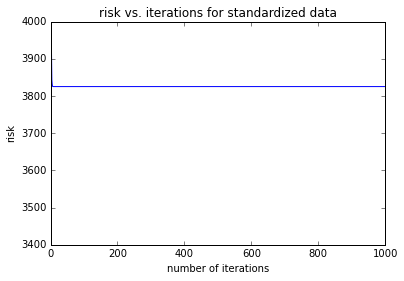

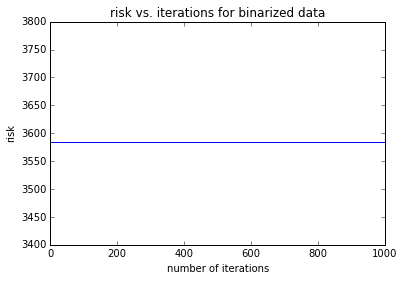

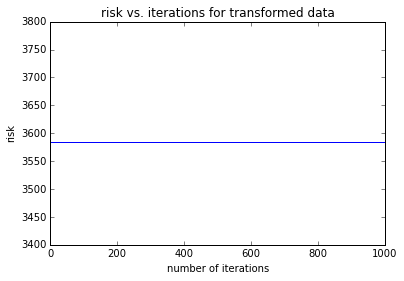

In [1739]:
x_range = range(1001)
plt.figure()
plt.title('risk vs. iterations for standardized data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, varying_epsilon[0])

plt.figure()
plt.title('risk vs. iterations for binarized data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, varying_epsilon[1])

plt.figure()
plt.title('risk vs. iterations for transformed data')
plt.xlabel('number of iterations')
plt.ylabel('risk')
plt.plot(x_range, varying_epsilon[2])
plt.show()

### Kernalization 
### Logistic ridge regression -- uses logistic function
### Using binarized data to run stochastic update

In [1407]:
def splittingData(spam_data_train, spam_data_label):
    spam_data_train = preprocessing.binarize(spam_data_train)
    numVal = int(spam_data_train.shape[0]/3)
    numTrain = spam_data_train.shape[0] - int(numVal)
    valIndices = random.sample(range(0,spam_data_train.shape[0]), numVal)
    validation_data = np.zeros((numVal,spam_data_train.shape[1]))
    validation_labels = np.zeros(numVal)
    training_data = np.zeros((numTrain,spam_data_train.shape[1]))
    training_labels = np.zeros(numTrain)
    valInd = 0
    trainInd = 0
    for spam_ind in range(spam_data_train.shape[0]):
        if spam_ind in valIndices:
            validation_data[valInd]= spam_data_train[spam_ind,:]
            validation_labels[valInd] = spam_data_label[spam_ind]
            valInd = valInd +1
        else:
            training_data[trainInd] = spam_data_train[spam_ind,:]
            training_labels[trainInd] = spam_data_label[spam_ind]
            trainInd = trainInd + 1
    return (validation_data, validation_labels, training_data, training_labels)

In [1408]:
(spam_validation_data, spam_validation_labels, spam_training_data, spam_training_labels) = splittingData(spam_data_train, spam_data_label)

In [1410]:
def kernelMatrix(spam_training_data, p): ##p is a scalar
    kernal_matrix = np.square((np.dot(spam_training_data, spam_training_data.T)+p))
    return kernal_matrix

In [1411]:
def kernelMatrix_linear(spam_training_data, p): ##p is a scalar
    kernal_matrix = np.dot(spam_training_data, spam_training_data.T)+p
    return kernal_matrix
    

In [1412]:
def weight_update_kernel(weights, X_data, Y_data, epsilon, lambd, index): #X_data is a row of the kernel comb. matrix
    sigCalc = sigmoid(X_data)
    subY_data = (Y_data - sigCalc)*epsilon
    weights = weights - epsilon*lambd*weights
    weights[index]= weights[index]+ subY_data
    return weights 


In [1413]:
def kernel_risk(kernel_comb, Y_data):
    ##need to use sigmoid approximation
    sigCalc = sigmoid(kernel_comb)
    sigCalc[sigCalc==0]=math.pow(10,-300)
    
    subCalc = float(1)-sigCalc
    subCalc[subCalc==0]=math.pow(10,-300)
    
    normSigCalc= np.log(sigCalc)
    subSigCalc = np.log(subCalc)
    
    subY_data = float(1)- Y_data
    return -(np.dot(Y_data,normSigCalc)+np.dot(subY_data, subSigCalc))

In [1595]:
def kernel_ridge(spam_training_data, spam_training_labels, epsilon, lambd, p_value, n):
    ##set up kernel matrix and weights for a vector
    kernel_matrix = kernelMatrix(spam_training_data, p_value)
    kernel_weights = np.zeros(spam_training_data.shape[0])
    kernel_comb = np.dot(kernel_matrix,kernel_weights)

    ind = 0
    risk_calc = []
    final_kernel_weights = []
    while ind <= n:
        shuffled = np.random.permutation(np.arange(spam_training_data.shape[0]))
        for dataInd in shuffled:
            currRisk = kernel_risk(kernel_comb, spam_training_labels)
            risk_calc.append(currRisk)
            
            dataX = kernel_comb[dataInd]
            dataY = spam_training_labels[dataInd]
        
            kernel_weights = weight_update_kernel(kernel_weights,dataX, dataY,epsilon,lambd, dataInd)
        
            kernel_comb = np.dot(kernel_matrix,kernel_weights)
            
            ind = ind +1 
            if ind >n:
                final_kernel_weights = kernel_weights
                break

    weights = np.dot(spam_training_data.T, np.array(final_kernel_weights))
        
    return (risk_calc, weights)
    

In [1596]:
def kernel_linear(spam_training_data, spam_training_labels, epsilon, lambd, p_value, n):
    ##set up kernel matrix and weights for a vector
    kernel_matrix = kernelMatrix_linear(spam_training_data, p_value)
    kernel_weights = np.zeros(spam_training_data.shape[0])
    kernel_comb = np.dot(kernel_matrix,kernel_weights)
    
    ind = 0
    risk_calc = []
    final_kernel_weights = []
    while ind <= n:
        shuffled = np.random.permutation(np.arange(spam_training_data.shape[0]))
        for dataInd in shuffled:
            currRisk = kernel_risk(kernel_comb, spam_training_labels)
            risk_calc.append(currRisk)
        
            dataInd = random.sample(range(spam_training_data.shape[0]),1)
            dataX = kernel_comb[dataInd]
            dataY = spam_training_labels[dataInd]
        
            kernel_weights = weight_update_kernel(kernel_weights,dataX, dataY,epsilon, lambd, dataInd)
        
            kernel_comb = np.dot(kernel_matrix,kernel_weights)
            ind = ind + 1
            if ind > n:
                final_kernel_weights = kernel_weights
                break

    weights = np.dot(np.array(final_kernel_weights).T, spam_training_data)
    return (risk_calc, weights)

## Training Polynomial and Linear Kernels for Logistic Ridge Regression

### Polynomial kernel results for logistic ridge regression
### Epsilon = 0.01, lambda = 0.001, 2000 iterations

In [1597]:
(log_ridge_kernel,weights)= kernel_ridge(spam_training_data, spam_training_labels, math.pow(10,-2), math.pow(10,-3), float(1), 2000)

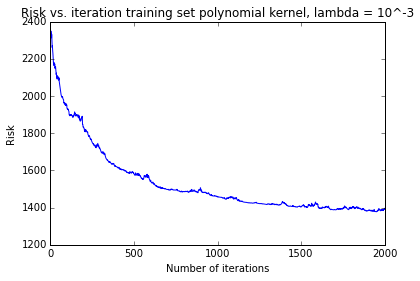

In [1745]:
##figure for lambda = 10^-3
plt.figure()
plt.title("Risk vs. iteration training set polynomial kernel, lambda = 10^-3")
plt.xlabel("Number of iterations")
plt.ylabel("Risk")
plt.plot(range(len(log_ridge_kernel)), log_ridge_kernel)

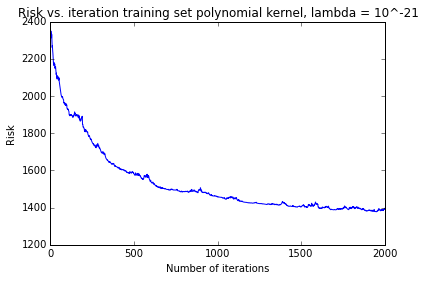

In [1746]:
##plot for lambda = 10^-21
plt.figure()
plt.title("Risk vs. iteration training set polynomial kernel, lambda = 10^-21")
plt.xlabel("Number of iterations")
plt.ylabel("Risk")
plt.plot(range(2001), log_ridge_kernel)

### Linear kernel results for logistic ridge regression
### Epsilon = 0.01, lambda = 0.001, 2000 iterations

In [1747]:
(linear_ridge_kernel, weights_linear) = kernel_linear(spam_training_data, spam_training_labels, math.pow(10,-2), math.pow(10,-3), 1, 2000)

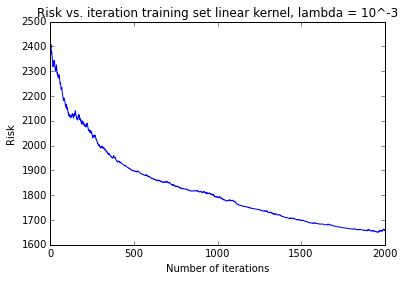

In [1748]:
plt.figure()
plt.title("Risk vs. iteration training set linear kernel, lambda = 10^-3")
plt.xlabel("Number of iterations")
plt.ylabel("Risk")
plt.plot(range(len(linear_ridge_kernel)), linear_ridge_kernel)

## Validation of Linear and Logistic Ridge Regression

In [1603]:
(log_ridge_kernel_validation,weights_validation)= kernel_ridge(spam_validation_data, spam_validation_labels, math.pow(10,-2), math.pow(10,-3), float(1), 2000)

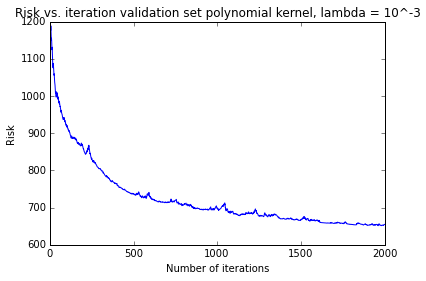

In [1749]:
plt.figure()
plt.title("Risk vs. iteration validation set polynomial kernel, lambda = 10^-3")
plt.xlabel("Number of iterations")
plt.ylabel("Risk")
plt.plot(range(2001), log_ridge_kernel_validation)

In [1605]:
(linear_ridge_kernel_validation, weights_linear_validation) = kernel_linear(spam_validation_data, spam_validation_labels, math.pow(10,-2), math.pow(10,-3), 1, 2000)

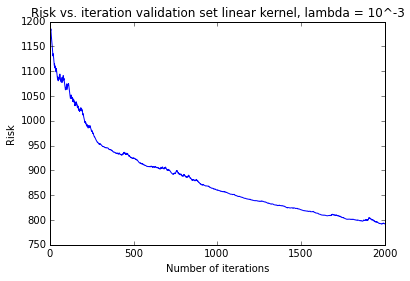

In [1750]:
plt.figure()
plt.title("Risk vs. iteration validation set linear kernel, lambda = 10^-3")
plt.xlabel("Number of iterations")
plt.ylabel("Risk")
plt.plot(range(2001), linear_ridge_kernel_validation)

## Testing for Kaggle
### Polynomial kernel was found better for fitting -- will be used for Kaggle predictions

In [1607]:
spam_data_binarized = preprocessing.binarize(spam_data_train)

In [1608]:
(log_ridge_kernel_total,weights_total)= kernel_ridge(spam_data_binarized, spam_data_label, math.pow(10,-2), math.pow(10,-3), float(1), 3000)

In [1609]:
(linear_ridge_kernel_total,weights_total_linear)=kernel_linear(spam_data_binarized, spam_data_label, math.pow(10,-2), math.pow(10,-3), float(1), 3000)

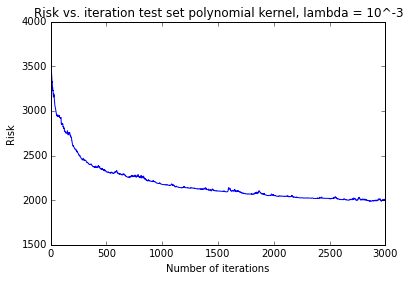

In [1751]:
##plot for lambda = 10^-3
plt.figure()
plt.title("Risk vs. iteration test set polynomial kernel, lambda = 10^-3")
plt.xlabel("Number of iterations")
plt.ylabel("Risk")
plt.plot(range(3001), log_ridge_kernel_total)

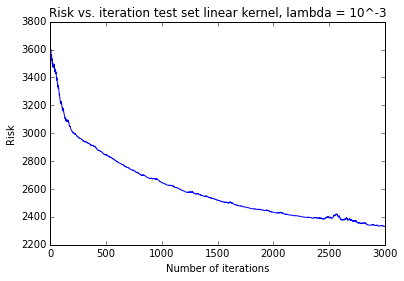

In [1752]:
plt.figure()
plt.title("Risk vs. iteration test set linear kernel, lambda = 10^-3")
plt.xlabel("Number of iterations")
plt.ylabel("Risk")
plt.plot(range(3001), linear_ridge_kernel_total)

In [1638]:
def predicting_labels(weights_total, spam_data_test):
    spam_data_test = preprocessing.binarize(spam_data_test)
    posterior_prob = sigmoid(np.dot(spam_data_test,weights_total))
    print posterior_prob
    for i, post in enumerate(posterior_prob):
        if post > 0.5:
            posterior_prob[i] = float(1)
        else:
            posterior_prob[i]= float(0)
    return posterior_prob

In [1639]:
predictions_polynomial = predicting_labels(weights_total, spam_data_test)

[ 0.54672938  0.45299749  0.46879906 ...,  0.41782837  0.39842146
  0.45225846]


In [1640]:
predictions_linear = predicting_labels(weights_total_linear, spam_data_test)

[ 0.68142536  0.4714301   0.39055115 ...,  0.31216043  0.27627531
  0.32097181]


In [1642]:
import csv
with open('spam_predictions_polynomial.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id','Category'])
    sh = 1
    for pred in predictions_polynomial:
        writer.writerow([sh,int(pred)])
        sh = sh + 1

In [1753]:
import csv
with open('spam_predictions_linear.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id','Category'])
    shl = 1
    for pred_l in predictions_linear:
        writer.writerow([shl,int(pred_l)])
        shl = shl + 1

### kaggle score- 0.723 accuracy
### could improve by training epsilon, lambda better and checking for over-fitting

## Question 4 -- attached in separate pdf

## Question 5 -- Real World Spam Classification

### As Daniel featurizes the arrival of the emails as time before the previous midnight, the features neglect the emails that have arrived just before midnight. For example, say that email A arrives 5 seconds before midnight_1 and email B arrives 5 seconds after the same midnight_1. According to Daniel's featurized vector, email A would be a feature for  midnight_0, and would have an incredibly large timestamp. Furthermore, any emails seen before email A would also have an increasing time stamp value depending on their arrival after midnight_0. This creates a continuous function that cannot be linearly seperable by an SVM. As an SVM is utilized for linearly seperable data, the way that Daniel has implemented the time stamps creates continuous non-linearly seperable features. A way to work around this error and create a linearly data would be to featurize the email by its distance from the closest midnight. So email_A and email_B would have the same feature item added to their feature vector. This "distance" calculation will allow for emails seen closer to midnight be one class and those further from midnight to be another. A more sinuous curve could also be fit to the distance features as the polynoimal kernel can fit better to this curve.